In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#################
### Data
#################
flowers = pd.DataFrame({
    'species':np.random.choice(a=['Alyssum','Amaranthus','Aster','Rose', 'Lily', 'Jonquil'], size=1000),
    'shades':np.random.choice(a=['red','blue'], size=1000),
    'prod_summer': 260+np.random.randn(1000)*np.sin(np.pi/4),
    'prod_winter': 150+np.random.normal(100, 30, 1000),
    'prod_fall': 355+np.random.normal(300, 130, 1000),
    'prod_spring': 440+np.random.normal(450, 70, 1000),
    'num_orders': np.random.randn(1000)*2

    }
    ,index=pd.date_range('2019-01-01', periods=1000)
)
#################

### Plot 

<AxesSubplot:>

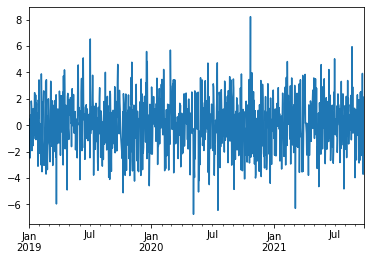

In [3]:
plt.figure()
flowers['num_orders'].plot()

<AxesSubplot:>

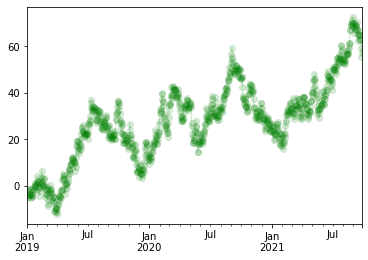

In [4]:
plt.figure()
flowers['num_orders'].cumsum().plot(style = 'g-o', alpha = .15)

In [5]:
type(flowers['num_orders'])

pandas.core.series.Series

In [6]:
type(flowers[['num_orders']])

pandas.core.frame.DataFrame

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

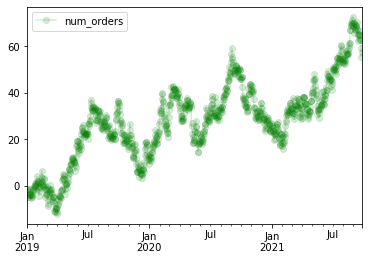

In [7]:
plt.figure()
flowers[{'num_orders'}].cumsum().plot(style = 'g-o', alpha = .15)

### Log

<AxesSubplot:>

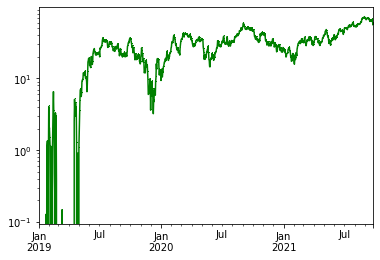

In [8]:
flowers['num_orders'].cumsum().plot(style = 'g-,',logy = True)

In [9]:
temp = flowers[['num_orders']].copy()
temp['num_orders2'] = temp['num_orders'] * -10
temp.head(2)

,num_orders,num_orders2
2019-01-01,-1.790253,17.902526
2019-01-02,0.454377,-4.543770


Text(0, 0.5, 'Right Scale')

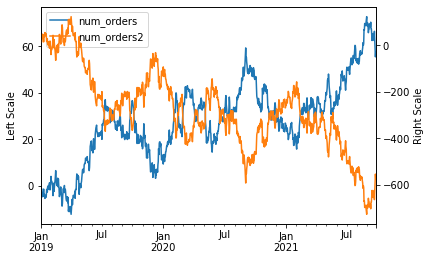

In [10]:
ax = temp.cumsum().plot(secondary_y=['num_orders2'], mark_right = False)
ax.set_ylabel('Left Scale')
ax.right_ax.set_ylabel('Right Scale')

### Format X-Axis

<AxesSubplot:>

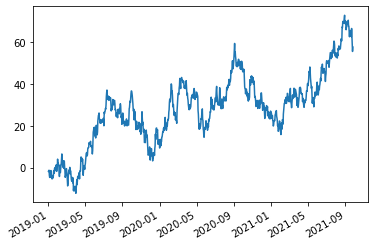

In [11]:
flowers['num_orders'].cumsum().plot(x_compat=True)

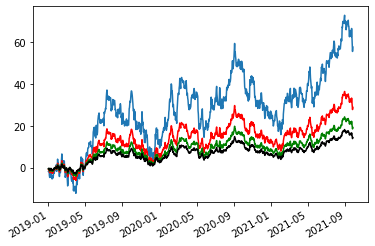

In [12]:
plt.figure()
with pd.plotting.plot_params.use('x_compat', True):
    flowers['num_orders'].cumsum().plot()
    (flowers['num_orders'].cumsum()/2).plot(c='r')
    (flowers['num_orders'].cumsum()/3).plot(c='g')
    (flowers['num_orders'].cumsum()/4).plot(c='k')


### Subplots

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

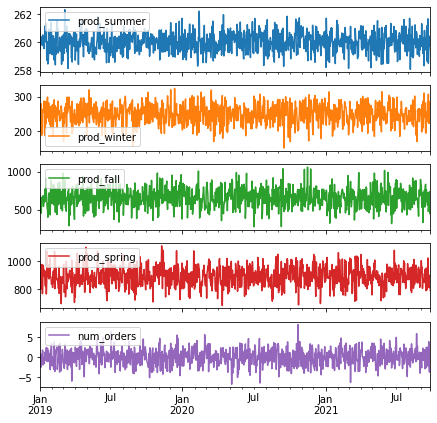

In [13]:
flowers.plot(subplots = True, figsize = (7,7))

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

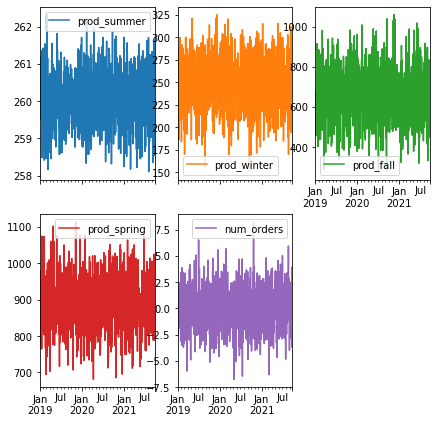

In [14]:
flowers.plot(subplots = True, layout = (2,3), figsize = (7,7), sharex=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

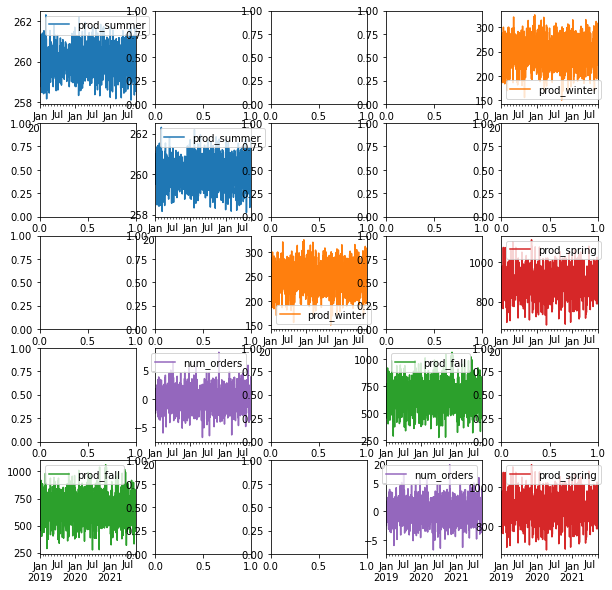

In [15]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize = (10,10))

pos_1 = [ax[0,0], ax[0,4], ax[4,0], ax[4,4], ax[4,3]]
pos_2 = [ax[1,1], ax[2,2], ax[3,3], ax[2,4], ax[3,1]]


flowers.plot(subplots = True, ax=pos_1, sharex = False, sharey = False)
flowers.plot(subplots = True, ax=pos_2, sharex = False, sharey = False)

### Error Bars

In [16]:
flowers_mean = flowers.groupby(['species']).mean()
flowers_std = flowers.groupby(['species']).std()

In [17]:
flowers_mean

,prod_summer,prod_winter,prod_fall,prod_spring,num_orders
species,,,,,
Alyssum,259.974750,249.686234,655.910571,894.619925,-0.078414
Amaranthus,260.050395,249.719454,667.172154,895.458860,0.277354
Aster,260.024239,244.964046,648.326610,895.715060,0.082657
Jonquil,259.945793,254.939292,660.377138,877.901813,0.061801
Lily,260.048260,249.660739,660.742884,881.572855,-0.100384
Rose,260.048199,250.136262,652.433451,895.042729,0.099269


In [18]:
flowers_std

,prod_summer,prod_winter,prod_fall,prod_spring,num_orders
species,,,,,
Alyssum,0.654769,29.094861,127.605973,80.761699,1.904277
Amaranthus,0.661670,25.882617,132.984700,65.161280,2.078174
Aster,0.685533,28.614472,127.757939,65.791331,1.943694
Jonquil,0.735352,29.692680,130.883593,72.818219,2.194360
Lily,0.701744,30.041517,123.629850,72.187641,1.863028
Rose,0.734655,29.903058,126.718485,66.377707,2.099046


<AxesSubplot:xlabel='species'>

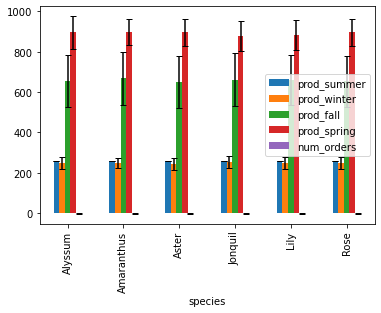

In [20]:
flowers_mean.plot.bar(yerr = flowers_std, capsize = 3)

### Tables

<AxesSubplot:xlabel='species'>

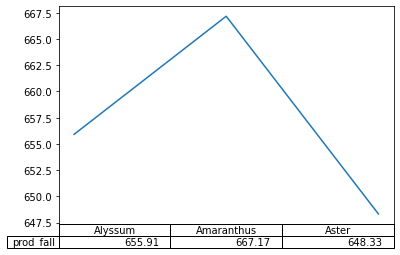

In [21]:
fig,ax = plt.subplots(1,1)
ax.get_xaxis().set_visible(False)

flowers_mean.iloc[:3,2].round(2).plot(table=True, ax=ax)

<AxesSubplot:xlabel='species'>

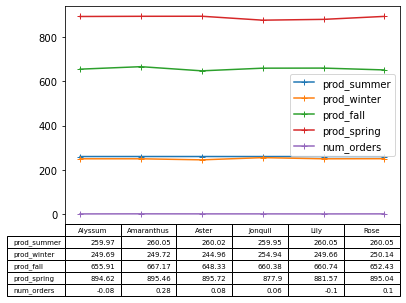

In [25]:
fig, ax = plt.subplots(1,1)

ax.get_xaxis().set_visible(False)

flowers_mean.round(2).plot(table=np.round(flowers_mean.T,2), ax=ax, marker='+')

In [26]:
from pandas.plotting import table

<AxesSubplot:xlabel='species'>

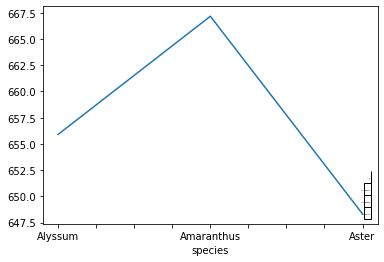

In [29]:
fig, ax = plt.subplots(1,1)
table(ax, flowers_mean.iloc[:3,2], loc = 'lower right', colWidths= [0,2]*1)
flowers_mean.iloc[:3,2].round(2).plot(ax=ax)

### ColorMaps

<AxesSubplot:>

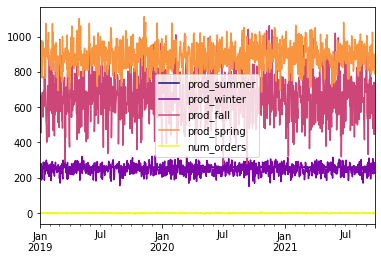

In [30]:
flowers.plot(colormap = 'plasma')

In [31]:
from matplotlib import cm

<AxesSubplot:>

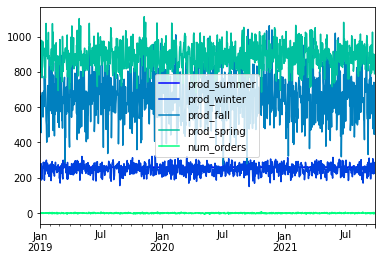

In [33]:
flowers.plot(colormap=cm.winter)